In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px 
import pylab
from scipy import stats
from scipy.stats import zscore, probplot
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from tensorflow.keras import layers
import tensorflow as tf
from nltk.stem import PorterStemmer, WordNetLemmatizer
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.keras.layers import Dense, Embedding,Flatten, Dense, LSTM, Dropout, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.layers import Dropout
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import re
import nltk 
nltk.download("stopwords")
nltk.download("punkt")
from nltk.corpus import stopwords
nltk.download('punkt')
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [74]:
train = pd.read_csv('../input/iba-ml1-final-project/train.csv')
test = pd.read_csv('../input/iba-ml1-final-project/test.csv')

In [75]:
train.duplicated().sum()
test.duplicated().sum()

0

>  # EDA

In [76]:
train.describe()
#from here we can see that the column "Recommended" infered as an integer(numeric) variable.

,Id,Age,Pos_Feedback_Cnt,Rating,Recommended
count,14091.000000,14091.000000,14091.000000,14091.000000,14091.000000
mean,11713.941736,43.093677,2.465474,4.197786,0.822511
std,6768.152493,12.176401,5.519936,1.109792,0.382096
min,0.000000,18.000000,0.000000,1.000000,0.000000
25%,5860.000000,34.000000,0.000000,4.000000,1.000000
50%,11693.000000,41.000000,1.000000,5.000000,1.000000
75%,17555.500000,51.000000,3.000000,5.000000,1.000000
max,23485.000000,94.000000,122.000000,5.000000,1.000000


In [77]:
#in order to make sure let's get a types of variables in train and test data
print(train.dtypes) 

Id                   int64
Age                  int64
Review_Title        object
Review              object
Pos_Feedback_Cnt     int64
Division            object
Department          object
Product_Category    object
Rating               int64
Recommended          int64
dtype: object


In [78]:
print('We have {} training rows and {} test rows.'.format(train.shape[0], test.shape[0]))
print('We have {} training columns and {} test columns.'.format(train.shape[1], test.shape[1]))
print(train.shape)
print(test.shape)

We have 14091 training rows and 9395 test rows.
We have 10 training columns and 8 test columns.
(14091, 10)
(9395, 8)


### Visual of missing values

,Null
Review_Title,2359
Review,503
Division,11
Department,11
Product_Category,11


,Id,Age,Review_Title,Review,Pos_Feedback_Cnt,Division,Department,Product_Category,Rating,Recommended
1,5921,35,NaN,NaN,0,General,Tops,Blouses,5,1
6,6771,52,NaN,Love these jeans!! i ordered one pair and like...,0,General Petite,Bottoms,Jeans,5,1
10,6124,47,NaN,"I love this vest, good denim quality",1,General Petite,Coats,Coats,4,1
40,3329,48,NaN,NaN,0,General,Coats,Coats,4,1
46,15120,46,NaN,"I love these, but i should have ordered the si...",0,General,Bottoms,Jeans,4,1
...,...,...,...,...,...,...,...,...,...,...
14060,1372,52,NaN,Love this t-shirt. the weight is magnificent f...,2,General,Tops,Knits,5,1
14069,4650,39,NaN,The shirt is beautiful but slightly long. it i...,1,General Petite,Tops,Knits,5,1
14075,14622,38,NaN,NaN,0,General,Clothes,Clothes,5,1
14085,19682,40,NaN,Very very boxy design/cut. try on first or buy...,1,General Petite,Bottoms,Skirts,2,0


Text(0.5, 1.0, 'Missing Values by Variable')

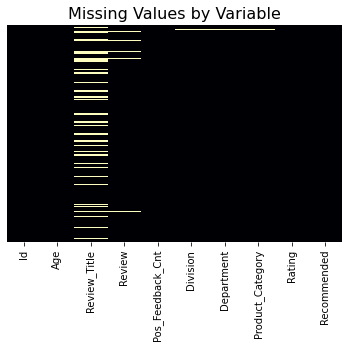

In [79]:
null_df = pd.Series(pd.isnull(train).sum(), name = 'Null').to_frame()
display(null_df.loc[null_df['Null'] != 0], train.loc[train.isnull().any(axis = 1)])

sns.heatmap(data = train.isnull(), yticklabels = False, cbar = False, cmap = 'magma')
plt.title(label = 'Missing Values by Variable', size = 16)

### Percentage of Missing values for train set

In [80]:
null_variables = []
for x in null_df.loc[null_df['Null'] != 0].index:
    null_variables.append(x)
for var in null_variables:
    print('In the train data we have {:.2f} missing values for '.format(train[var].isnull().sum())+ '' + var + ' variable.')
    print('Missing values form {:.2f}% of total records for'.format((train[var].isnull().sum() / train.shape[0]) * 100) + 
          ' ' + var + ' variable.')
    print("===============================================================")

In the train data we have 2359.00 missing values for Review_Title variable.
Missing values form 16.74% of total records for Review_Title variable.
In the train data we have 503.00 missing values for Review variable.
Missing values form 3.57% of total records for Review variable.
In the train data we have 11.00 missing values for Division variable.
Missing values form 0.08% of total records for Division variable.
In the train data we have 11.00 missing values for Department variable.
Missing values form 0.08% of total records for Department variable.
In the train data we have 11.00 missing values for Product_Category variable.
Missing values form 0.08% of total records for Product_Category variable.


### Visual of missing values for test set

,Null
Review_Title,1451
Review,342
Division,3
Department,3
Product_Category,3


,Id,Age,Review_Title,Review,Pos_Feedback_Cnt,Division,Department,Product_Category
9,14134,40,NaN,"So pretty. 5'4"" 115 lbs and the xs fits excell...",2,General,Bottoms,Shorts
12,4416,34,NaN,This clothe is magnificent! i purchased the na...,0,General Petite,Clothes,Clothes
32,11149,33,NaN,My preferred shirt!!! i wear it when i don't w...,0,General,Tops,Knits
36,19240,36,NaN,I love the way this fits and feels on. it is a...,0,General Petite,Tops,Fine gauge
37,1482,36,NaN,I ordered these because i loved the wide cut a...,0,General,Bottoms,Jeans
...,...,...,...,...,...,...,...,...
9365,15219,51,NaN,NaN,0,General Petite,Tops,Knits
9366,6155,62,NaN,I ordered this clothe before it became availab...,1,General Petite,Clothes,Clothes
9367,6730,38,NaN,"Such a beautiful, flattering clothe! i bought ...",0,General,Clothes,Clothes
9370,20307,38,NaN,"I liked the jeans, but exchanges them for ag's...",0,General Petite,Bottoms,Jeans


Text(0.5, 1.0, 'Missing Values by Variable')

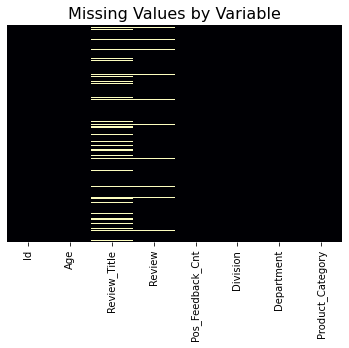

In [81]:
null_df = pd.Series(pd.isnull(test).sum(), name = 'Null').to_frame()
display(null_df.loc[null_df['Null'] != 0], test.loc[test.isnull().any(axis = 1)])

sns.heatmap(data = test.isnull(), yticklabels = False, cbar = False, cmap = 'magma')
plt.title(label = 'Missing Values by Variable', size = 16)

### Percentage of Missing values for test set

In [82]:
null_variables = []

for x in null_df.loc[null_df['Null'] != 0].index:
    null_variables.append(x)
    
for var in null_variables:
    print('In the test data we have {:.2f} missing values for '.format(test[var].isnull().sum())+ '' + var + ' variable.')
    print('Missing values form {:.2f}% of total records for'.format((test[var].isnull().sum() / test.shape[0]) * 100) + 
          ' ' + var + ' variable.')
    print("===============================================================")

In the test data we have 1451.00 missing values for Review_Title variable.
Missing values form 15.44% of total records for Review_Title variable.
In the test data we have 342.00 missing values for Review variable.
Missing values form 3.64% of total records for Review variable.
In the test data we have 3.00 missing values for Division variable.
Missing values form 0.03% of total records for Division variable.
In the test data we have 3.00 missing values for Department variable.
Missing values form 0.03% of total records for Department variable.
In the test data we have 3.00 missing values for Product_Category variable.
Missing values form 0.03% of total records for Product_Category variable.


*we cant drop the nan values that's why we need to impute them. For imputation I am looking for the other customer reviews with the key words in them. And find the division, department, prodcut category with the help of this technique.*

In [83]:
test[test['Department'].isnull()]

,Id,Age,Review_Title,Review,Pos_Feedback_Cnt,Division,Department,Product_Category
1372,16223,39,"""long and warm""",These leg warmers are excellent for me. they a...,0,NaN,NaN,NaN
1566,22997,47,"Charcoal, pale gray, a bit of silver!","These socks are soft and comfortable, and they...",1,NaN,NaN,NaN
5995,16216,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",0,NaN,NaN,NaN


In [84]:
test[test['Review'].str.contains('leg warmers', case = False, na = False)]
#we can get that the leg warmers belongs to Initmates, Intimate, Legwear

,Id,Age,Review_Title,Review,Pos_Feedback_Cnt,Division,Department,Product_Category
1372,16223,39,"""long and warm""",These leg warmers are excellent for me. they a...,0,NaN,NaN,NaN
7759,12188,39,"""excellent with jeans""",Magnificent with leggings.excellent with cold ...,0,Initmates,Intimate,Legwear


In [85]:
test[test['Review'].str.contains('socks', case = False, na = False)][:5]
#socks also belong to the Initmates, Intimate, Legwear

,Id,Age,Review_Title,Review,Pos_Feedback_Cnt,Division,Department,Product_Category
611,7674,36,Comfortable and beautiful!,"My review is of the ""black motif"" (no longer l...",0,Initmates,Intimate,Legwear
1566,22997,47,"Charcoal, pale gray, a bit of silver!","These socks are soft and comfortable, and they...",1,NaN,NaN,NaN
1574,18694,35,Feel these socks!,These socks feel amazing-i have them in both c...,17,Initmates,Intimate,Legwear
2308,3828,32,NaN,My new preferred socks! has a grip and doesn't...,0,Initmates,Intimate,Legwear
2387,15089,32,I purchased the purple color,"Cute socks, very comfy as well. good quality i...",0,Initmates,Intimate,Legwear


In [86]:
test[test['Review'].str.contains('warm and cozy', case = False, na = False)]
# so from here we dont have exact choice for the nan values, I will assign Initmates, Initmate, Sleep to this nan 

,Id,Age,Review_Title,Review,Pos_Feedback_Cnt,Division,Department,Product_Category
142,23411,46,Cozy sweater but runs large,I bought this sweater because i love twinkle's...,5,General,Tops,Sweaters
517,7475,35,Comfortable and cozy,I like this robe a lot. the tassel detailing o...,25,Initmates,Intimate,Sleep
4121,4841,63,Like wearing a hug,"Magnificent sweater, beautiful detail, warm an...",1,General,Tops,Sweaters
4947,5904,66,Unique,I ordered my normal size large and it fit well...,0,General,Tops,Fine gauge
5237,20615,38,Boho brilliance for below freezing temperatures,If you're like me and wish you could carry on ...,4,General,Tops,Sweaters
7345,16984,36,"Cozy, but runs large",I like the unique design and it's warm and coz...,1,General,Tops,Knits
9159,14636,50,Material was fuzzy and itchy,I got this clothe and the material was super f...,0,General,Clothes,Clothes
9196,14775,41,NaN,Love this coat... excellent for replacing old ...,0,General Petite,Intimate,Lounge
9267,14012,37,Flattering warmth,This sweater is warm and cozy. it has flatteri...,0,General Petite,Tops,Sweaters



filling missing values in test

In [87]:
test.fillna({'Division':'Initmates', 'Department': 'Intimate', 'Product_Category': 'Legwear'}, inplace=True)

In [88]:
imputer = SimpleImputer(strategy='most_frequent')
train['Division']=imputer.fit_transform(train[['Division']])
train['Department'] = imputer.fit_transform(train[['Department']])
train['Product_Category'] = imputer.fit_transform(train[['Product_Category']])

In [89]:
print(test.isnull().sum())
print('-----------------------------')
print(train.isnull().sum())

Id                     0
Age                    0
Review_Title        1451
Review               342
Pos_Feedback_Cnt       0
Division               0
Department             0
Product_Category       0
dtype: int64
-----------------------------
Id                     0
Age                    0
Review_Title        2359
Review               503
Pos_Feedback_Cnt       0
Division               0
Department             0
Product_Category       0
Rating                 0
Recommended            0
dtype: int64


In [90]:
train.columns

Index(['Id', 'Age', 'Review_Title', 'Review', 'Pos_Feedback_Cnt', 'Division',
       'Department', 'Product_Category', 'Rating', 'Recommended'],
      dtype='object')

Text(0.5, 0, 'Age')

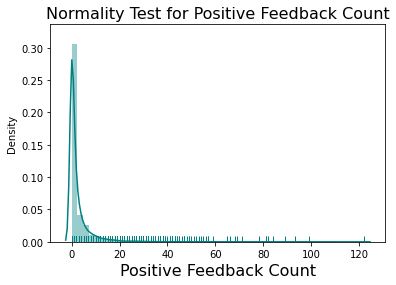

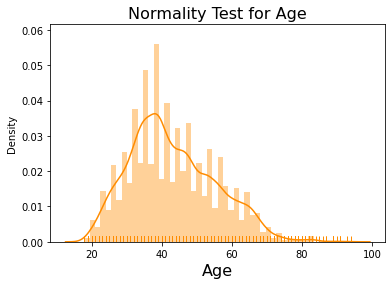

In [91]:
plt.figure()
sns.distplot(a = train['Pos_Feedback_Cnt'], kde = True, rug = True, color = 'teal')
plt.title(label = 'Normality Test for Positive Feedback Count', size = 16)
plt.xlabel(xlabel = 'Positive Feedback Count', size = 16)

plt.figure()
sns.distplot(a = train['Age'], kde = True, rug = True, color = 'darkorange')
plt.title(label = 'Normality Test for Age', size = 16)
plt.xlabel(xlabel = 'Age', size = 16)

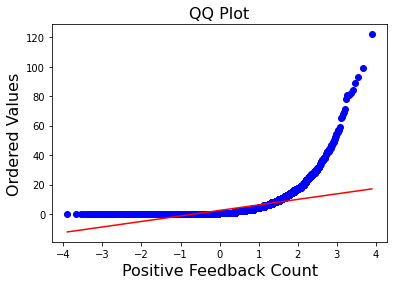

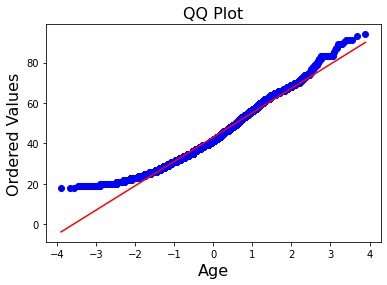

In [92]:
probplot(x = train['Pos_Feedback_Cnt'], plot = pylab)
plt.title(label = 'QQ Plot', size = 16)
plt.ylabel(ylabel = 'Ordered Values', size = 16)
plt.xlabel(xlabel = 'Positive Feedback Count', size = 16)
pylab.show()

probplot(x = train['Age'], plot = pylab)
plt.title(label = 'QQ Plot', size = 16)
plt.ylabel(ylabel = 'Ordered Values', size = 16)
plt.xlabel(xlabel = 'Age', size = 16)
pylab.show()
#positive feedback count is not normally distirbuted but age is

<AxesSubplot:>

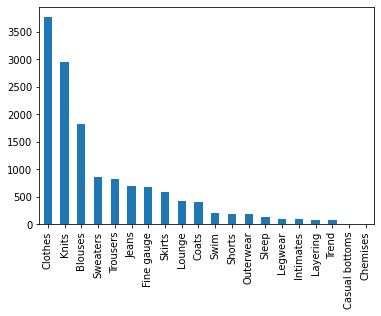

In [93]:
train['Product_Category'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='Division,Department,Product_Category'>

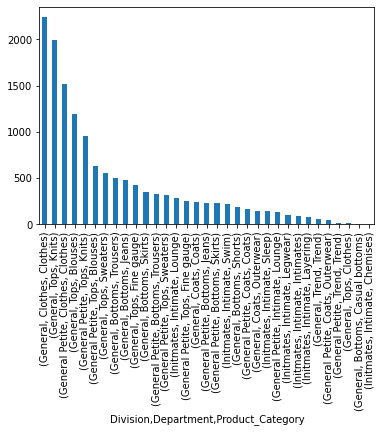

In [94]:
train[['Division', 'Department', 'Product_Category']].value_counts().plot(kind = 'bar')

<AxesSubplot:>

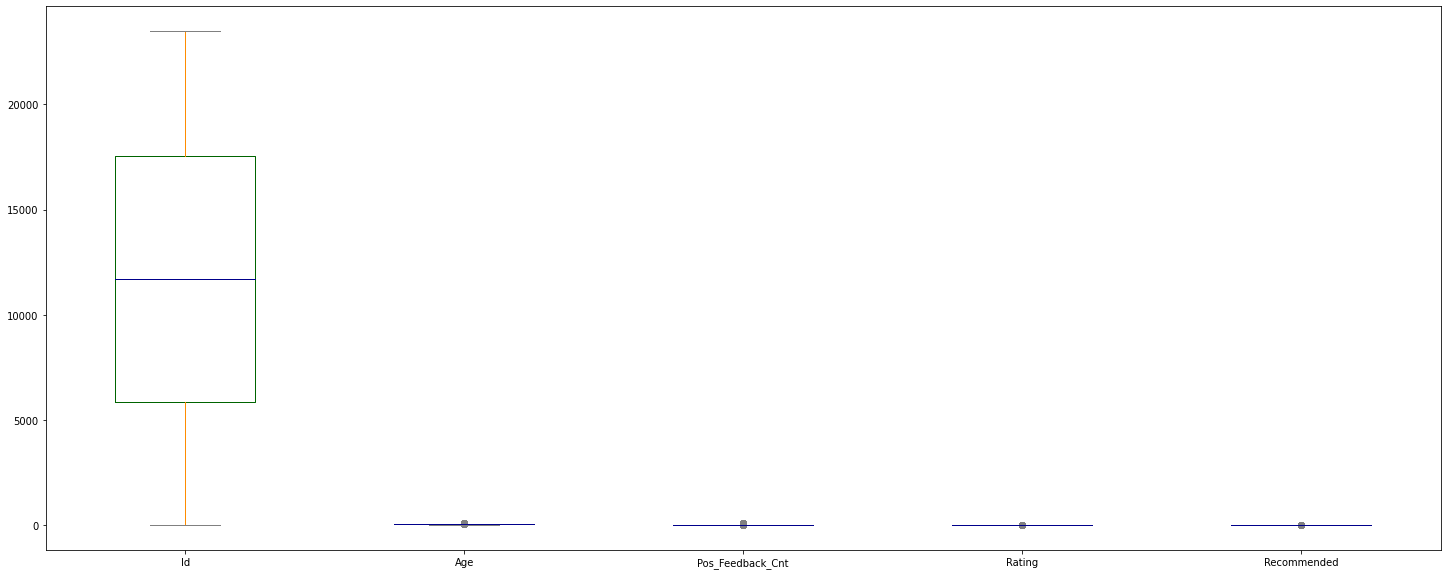

In [95]:
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}
 
train.plot.box(figsize=(25,10),color=color, sym="grey")

In [96]:
px.histogram(train, x = train['Rating'])

In [97]:
fig = px.histogram(train, x="Product_Category" ,barmode="group", color="Recommended")
fig.show()

# mostly recommended and not recommended product category is clothe and knits

<AxesSubplot:>

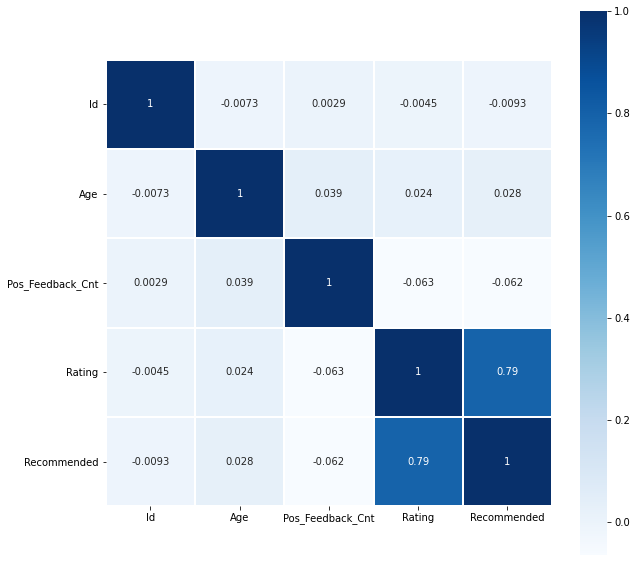

In [98]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True, cmap='Blues')

Text(0.5, 1.0, 'Correlation with target variable')

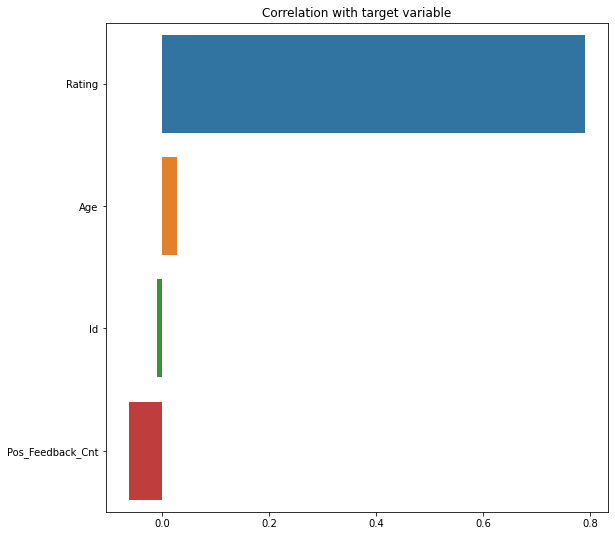

In [99]:
corr_w_target = train.corr().iloc[:-1, -1].sort_values(ascending=False)
plt.figure(figsize=(9, 9))
sns.barplot(x=corr_w_target.values, y=corr_w_target.index)
plt.title('Correlation with target variable')
#rating and recommended is highly correlated

In [100]:
fig = px.histogram(train['Recommended'], color = train['Recommended'], title = 'Proportion Target Class')
fig.show()
#class 1 is more than class 0

In [101]:
fig = px.pie(train, values='Rating', names='Rating', title='Ratings Proportion', hole = 0.6, color = 'Rating',
             color_discrete_map={5:'darkblue',4:'blue',3:'royalblue',2:'cyan' , 1: 'lightcyan'})
fig.show()
#rating of 5 is more, it means customers who buy the products gives a rating of 5 to it.

In [102]:
px.scatter(train, x="Age", y="Pos_Feedback_Cnt", facet_col="Rating",trendline="ols",category_orders={"Rating": [1,2,3,4,5],'Recommended':[0,1]})

In [103]:
px.box(train, x="Age", y="Division",color = 'Recommended')

#### Average Rating and visualization of them by division

In [104]:
general = train.loc[train['Division'] == 'General',:]
ratings = list(general['Rating'])
print("Average Rating of General division is:",sum(ratings)/len(ratings))

Average Rating of General division is: 4.177926581370322


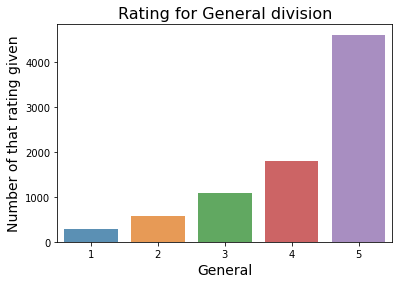

In [105]:
general = train.loc[train['Division'] == 'General']
x_axis = general['Rating'].value_counts().index.tolist()
rating_value = general['Rating'].value_counts().values.tolist()

sns.barplot(x_axis, rating_value, alpha=0.8)
plt.xlabel('General', fontsize=14)
plt.ylabel('Number of that rating given', fontsize=14)
plt.title("Rating for General division", fontsize=16)
plt.show()

In [106]:
general_petite = train.loc[train['Division'] == 'General Petite',:]
ratings = list(general['Rating'])
print("Average Rating of General Petite division is:",sum(ratings)/len(ratings))

Average Rating of General Petite division is: 4.177926581370322


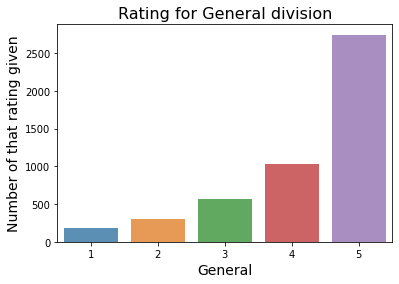

In [107]:
general_petite = train.loc[train['Division'] == 'General Petite']
x_axis = general_petite['Rating'].value_counts().index.tolist()
rating_value = general_petite['Rating'].value_counts().values.tolist()

sns.barplot(x_axis, rating_value, alpha=0.8)
plt.xlabel('General', fontsize=14)
plt.ylabel('Number of that rating given', fontsize=14)
plt.title("Rating for General division", fontsize=16)
plt.show()

In [108]:
initmate = train.loc[train['Division'] == 'Initmates',:]
ratings = list(initmate['Rating'])
print("Average Rating of Initmate division is:",sum(ratings)/len(ratings))

Average Rating of Initmate division is: 4.308628318584071


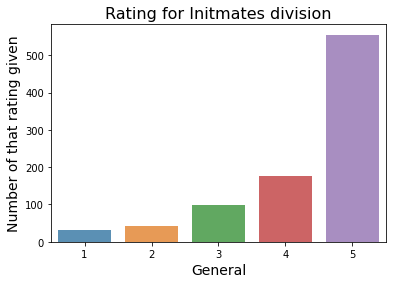

In [109]:
initmate = train.loc[train['Division'] == 'Initmates']
x_axis = initmate['Rating'].value_counts().index.tolist()
rating_value = initmate['Rating'].value_counts().values.tolist()

sns.barplot(x_axis, rating_value, alpha=0.8)
plt.xlabel('General', fontsize=14)
plt.ylabel('Number of that rating given', fontsize=14)
plt.title("Rating for Initmates division", fontsize=16)
plt.show()

#### Count of average words in per review
>  average count in each review is 57

In [110]:
totalreviews = list(train['Review'])
length = []
for i in range(0,len(totalreviews)):
        totalreviews[i] = str(totalreviews[i])
        a = len(totalreviews[i].split(' '))
        length.append(a)

    
print("On average a review has about:", sum(length)/len(length),"words in them")

On average a review has about: 57.596976793698104 words in them


In [111]:
dt = pd.DataFrame()
dt['length'] =  length
dt['ratings'] =  list(train['Rating'])
five_star = dt.loc[dt['ratings'] == 5,:]
five = sum(five_star['length'])/len(five_star['length'])
four_star = dt.loc[dt['ratings'] == 4,:]
four = sum(four_star['length'])/len(four_star['length'])
three_star = dt.loc[dt['ratings'] == 3,:]
three = sum(three_star['length'])/len(three_star['length'])
to_star = dt.loc[dt['ratings'] == 2,:]
to = sum(to_star['length'])/len(to_star['length'])
on_star = dt.loc[dt['ratings'] == 1,:]
on = sum(on_star['length'])/len(on_star['length'])

#### Visualizing the average number of words per rating
> Five star ratings are shortest whereas 3 star ratings tend to be the longest

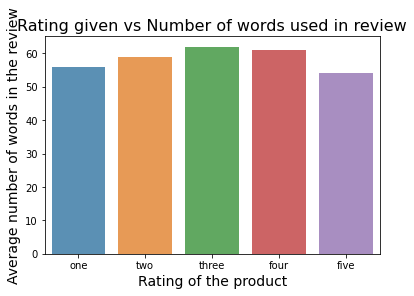

In [112]:
colors = ['gold', 'orange','yellowgreen', 'lightcoral', 'lightskyblue']
top = ['one','two','three','four','five']
value = [int(on), int(to),int(three),int(four),int(five)]
sns.barplot(top, value, alpha=0.8)
plt.xlabel('Rating of the product', fontsize=14)
plt.ylabel('Average number of words in the review', fontsize=14)
plt.title("Rating given vs Number of words used in review", fontsize=16)
plt.show()

## EDA for Test data

In [113]:
px.scatter(test, x="Age", y="Pos_Feedback_Cnt", trendline="ols")

<AxesSubplot:>

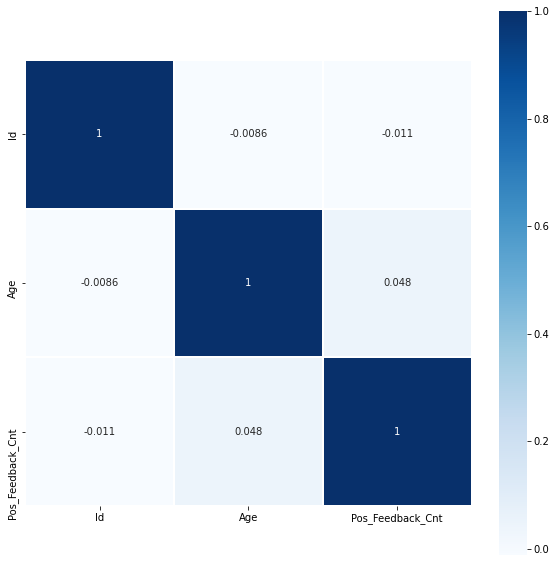

In [114]:
plt.figure(figsize=(10,10))
sns.heatmap(test.corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True, cmap='Blues')

In [115]:
fig = px.histogram(test, x="Product_Category" ,barmode="group" )
fig.show()

In [116]:
px.box(test, x="Age", y="Division")

Text(0.5, 0, 'Age')

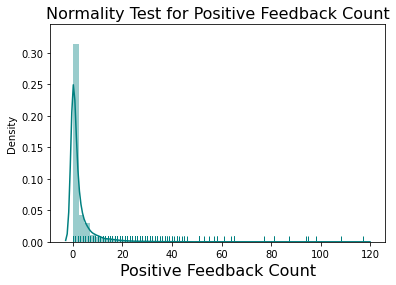

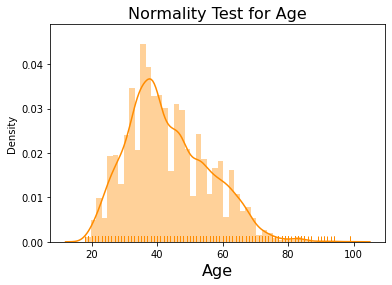

In [117]:
plt.figure()
sns.distplot(a = test['Pos_Feedback_Cnt'], kde = True, rug = True, color = 'teal')
plt.title(label = 'Normality Test for Positive Feedback Count', size = 16)
plt.xlabel(xlabel = 'Positive Feedback Count', size = 16)

plt.figure()
sns.distplot(a = test['Age'], kde = True, rug = True, color = 'darkorange')
plt.title(label = 'Normality Test for Age', size = 16)
plt.xlabel(xlabel = 'Age', size = 16)

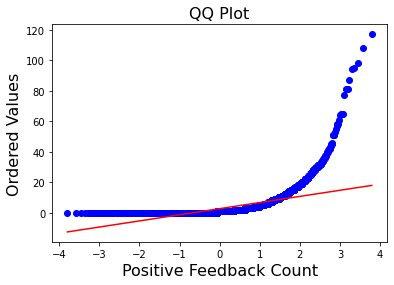

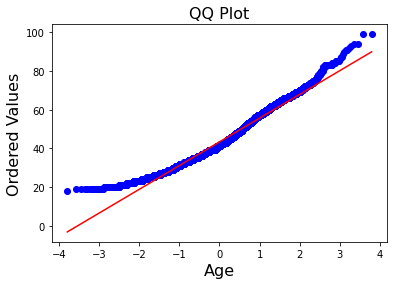

In [118]:
probplot(x = test['Pos_Feedback_Cnt'], plot = pylab)
plt.title(label = 'QQ Plot', size = 16)
plt.ylabel(ylabel = 'Ordered Values', size = 16)
plt.xlabel(xlabel = 'Positive Feedback Count', size = 16)
pylab.show()

probplot(x = test['Age'], plot = pylab)
plt.title(label = 'QQ Plot', size = 16)
plt.ylabel(ylabel = 'Ordered Values', size = 16)
plt.xlabel(xlabel = 'Age', size = 16)
pylab.show()

In [119]:
len(train['Product_Category'].unique())

20

In [120]:
train['Product_Category'].unique()

array(['Blouses', 'Clothes', 'Knits', 'Jeans', 'Coats', 'Sweaters',
       'Skirts', 'Trousers', 'Fine gauge', 'Lounge', 'Layering',
       'Intimates', 'Shorts', 'Chemises', 'Swim', 'Sleep', 'Trend',
       'Legwear', 'Outerwear', 'Casual bottoms'], dtype=object)

In [121]:
len(test['Product_Category'].unique())

18

In [122]:
test['Product_Category'].unique()
#in the test data we dont have a product category of chemises and casual bottoms, this can be a problem in our further evaluations and model. So we can remove 
#them from train data


array(['Clothes', 'Trousers', 'Layering', 'Jeans', 'Blouses', 'Outerwear',
       'Shorts', 'Lounge', 'Fine gauge', 'Knits', 'Sweaters', 'Coats',
       'Skirts', 'Intimates', 'Trend', 'Swim', 'Legwear', 'Sleep'],
      dtype=object)

> # Text preprocessing

In [123]:
train.drop(train[train['Product_Category'] == 'Chemises'].index, inplace = True)
train.drop(train[train['Product_Category'] == 'Casual bottoms'].index, inplace = True)

In [124]:
train[['Review']]=SimpleImputer(strategy='most_frequent').fit_transform(train[['Review']])
test[['Review']]=SimpleImputer(strategy='most_frequent').fit_transform(test[['Review']])
train[['Review_Title']]=SimpleImputer(strategy='most_frequent').fit_transform(train[['Review_Title']])
test[['Review_Title']]=SimpleImputer(strategy='most_frequent').fit_transform(test[['Review_Title']])

In [125]:
#train['Review'] = train['Review'].astype('str')

In [126]:
contractions = {
    "I'm": "I am",
    "i'm": "i am",
    "I've": "I have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'd": "I would",
    "I'd've": "I would have",
    "Whatcha": "What are you",
    "amn't": "am not",
    "ain't": "are not",
    "aren't": "are not",
    "'cause": "because",
    "can't": "can not",
    "can't've": "can not have",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "daren't": "dare not",
    "daresn't": "dare not",
    "dasn't": "dare not",
    "didn't": "did not",
    "didn’t": "did not",
    "don't": "do not",
    "don’t": "do not",
    "doesn't": "does not",
    "e'er": "ever",
    "everyone's": "everyone is",
    "finna": "fixing to",
    "gimme": "give me",
    "gon't": "go not",
    "gonna": "going to",
    "gotta": "got to",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he've": "he have",
    "he's": "he is",
    "he'll": "he will",
    "he'll've": "he will have",
    "he'd": "he would",
    "he'd've": "he would have",
    "here's": "here is",
    "how're": "how are",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how's": "how is",
    "how'll": "how will",
    "isn't": "is not",
    "it's": "it is",
    "'tis": "it is",
    "'twas": "it was",
    "it'll": "it will",
    "it'll've": "it will have",
    "it'd": "it would",
    "it'd've": "it would have",
    "kinda": "kind of",
    "let's": "let us",
    "luv": "love",
    "ma'am": "madam",
    "may've": "may have",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "ne'er": "never",
    "o'": "of",
    "o'clock": "of the clock",
    "ol'": "old",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "o'er": "over",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shalln't": "shall not",
    "shan't've": "shall not have",
    "she's": "she is",
    "she'll": "she will",
    "she'd": "she would",
    "she'd've": "she would have",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "somebody's": "somebody is",
    "someone's": "someone is",
    "something's": "something is",
    "sux": "sucks",
    "that're": "that are",
    "that's": "that is",
    "that'll": "that will",
    "that'd": "that would",
    "that'd've": "that would have",
    "em": "them",
    "there're": "there are",
    "there's": "there is",
    "there'll": "there will",
    "there'd": "there would",
    "there'd've": "there would have",
    "these're": "these are",
    "they're": "they are",
    "they've": "they have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they'd": "they would",
    "they'd've": "they would have",
    "this's": "this is",
    "those're": "those are",
    "to've": "to have",
    "wanna": "want to",
    "wasn't": "was not",
    "we're": "we are",
    "we've": "we have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we'd": "we would",
    "we'd've": "we would have",
    "weren't": "were not",
    "what're": "what are",
    "what'd": "what did",
    "what've": "what have",
    "what's": "what is",
    "what'll": "what will",
    "what'll've": "what will have",
    "when've": "when have",
    "when's": "when is",
    "where're": "where are",
    "where'd": "where did",
    "where've": "where have",
    "where's": "where is",
    "which's": "which is",
    "who're": "who are",
    "who've": "who have",
    "who's": "who is",
    "who'll": "who will",
    "who'll've": "who will have",
    "who'd": "who would",
    "who'd've": "who would have",
    "why're": "why are",
    "why'd": "why did",
    "why've": "why have",
    "why's": "why is",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "you're": "you are",
    "you've": "you have",
    "you'll've": "you shall have",
    "you'll": "you will",
    "you'd": "you would",
    "you'd've": "you would have"
 }

#### Remove contractions

In [127]:
def cont_2_ex(x):
    if type(x) is str:
        x = x.replace('\\', '')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x 
    else:
        return x

##### Let's check if our function works

In [128]:
x = "\n\nthe 'shawl' portion is only attached at the very top of the shoulders,\n\nvery disappointed."
print(cont_2_ex(x))



the 'shawl' portion is only attached at the very top of the shoulders,

very disappointed.


In [129]:
train['Review'] = train['Review'].apply(lambda x: cont_2_ex(x))

In [130]:
test['Review'] = test['Review'].apply(lambda x: cont_2_ex(x))

In [131]:
err1 = train['Review'].str.extractall("(&amp)")
err2 = train['Review'].str.extractall("(\xa0)")

In [132]:
print('with &amp',len(err1[~err1.isna()]))
print('with (\xa0)',len(err2[~err2.isna()]))

with &amp 25
with ( ) 6


In [133]:
train['Review'] = train['Review'].str.replace('(&amp)','')
train['Review'] = train['Review'].str.replace('(\xa0)','')

In [134]:
err1 = train['Review'].str.extractall("(&amp)")
print('with &amp',len(err1[~err1.isna()]))
err2 = train['Review'].str.extractall("(\xa0)")
print('with (\xa0)',len(err2[~err2.isna()]))
train.head()

with &amp 0
with ( ) 0


,Id,Age,Review_Title,Review,Pos_Feedback_Cnt,Division,Department,Product_Category,Rating,Recommended
0,17274,34,Cute fall/holiday top,Love this top! the quality is magnificent and ...,1,General,Tops,Blouses,5,1
1,5921,35,Love it!,Excellent fit and i've gotten so many complime...,0,General,Tops,Blouses,5,1
2,16479,40,Disappointed,"Sleeves were tight, was difficult to put on ?....",15,General,Tops,Blouses,2,0
3,1925,28,Gorgeous detailing,I never write reviews but this clothe is so fa...,3,General Petite,Clothes,Clothes,5,1
4,5691,39,Cute and comfortable tee!,Love this tshirt! casual but can be clotheed u...,0,General,Tops,Knits,5,1


In [135]:
test['Review'] = test['Review'].str.replace('(&amp)','')
err1 = test['Review'].str.extractall("(&amp)")
print('with &amp',len(err1[~err1.isna()]))
test.head()

with &amp 0


,Id,Age,Review_Title,Review,Pos_Feedback_Cnt,Division,Department,Product_Category
0,21403,53,Magnificent clothe!,"In contrast to the other reviewer, i love this...",4,General,Clothes,Clothes
1,22553,51,Shapeless tent,I tried this on in the store and it was huge. ...,2,General,Clothes,Clothes
2,17436,59,Versatile and then some,"I thought this was a fun piece to have, but di...",1,General,Bottoms,Trousers
3,4293,48,So simple but so cute!,I bought the multi-color stripe and it is ador...,1,General,Clothes,Clothes
4,20149,46,Magnificent simple tank,The wide strap style is very flattering. this ...,0,Initmates,Intimate,Layering


#### Training set review processing

In [136]:
  # Removing digits
train['Review'] = train['Review'].str.replace(r"\&\#[0-9]+\;", ' ', regex = True)
train['Review_Title'] = train['Review_Title'].str.replace(r"\&\#[0-9]+\;", ' ', regex = True)
train['Review'] = train['Review'].str.replace('\d+', '')
train['Review_Title'] = train['Review_Title'].str.replace('\d+', '')

    # remove all single characters
pattern = r'\s+[a-zA-Z]\s+'
train['Review'] = train['Review'].str.replace(pat=pattern, repl=" ", regex=True)
train['Review_Title'] = train['Review_Title'].str.replace(pat=pattern, repl="", regex=True)

    # Remove single characters from the start
pattern = r'\^[a-zA-Z]\s+'

train['Review'] = train['Review'].str.replace(pat=pattern, repl=" ", regex=True)
train['Review_Title'] = train['Review_Title'].str.replace(pat=pattern, repl="", regex=True)

    # Removing prefixed 'b'
pattern = r'^b\s+'

train['Review'] = train['Review'].str.replace(pat=pattern, repl=" ", regex=True)
train['Review_Title'] = train['Review_Title'].str.replace(pat=pattern, repl="", regex=True)

 # Substituting multiple spaces with single space
pattern = r"[\s]+"

train['Review'] = train['Review'].str.replace(pat=pattern, repl=" ", regex=True)
#not implemented for Review Title because most of phrases here, have single space

# Converting to a lower case
train['Review'] = train['Review'].str.lower()
train['Review_Title'] = train['Review_Title'].str.lower()

# Word Net Lemmatizer
lemmatizer = WordNetLemmatizer()
train['Review'] = [lemmatizer.lemmatize(i) for i in train['Review']]
train['Review_Title'] = [lemmatizer.lemmatize(i) for i in train['Review_Title']]

# Stopwords
train['Review'] = train['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in set(stopwords.words('english'))))
train['Review_Title'] = train['Review_Title'].apply(lambda x: " ".join(x for x in x.split() if x not in set(stopwords.words('english'))))


#### Test set review processing

In [137]:
  # Removing digits
test['Review'] = test['Review'].str.replace(r"\&\#[0-9]+\;", ' ', regex = True)
test['Review_Title'] = test['Review_Title'].str.replace(r"\&\#[0-9]+\;", ' ', regex = True)
test['Review'] = test['Review'].str.replace('\d+', '')
test['Review_Title'] = test['Review_Title'].str.replace('\d+', '')


    # remove all single characters
pattern = r'\s+[a-zA-Z]\s+'

test['Review'] = test['Review'].str.replace(pat=pattern, repl=" ", regex=True)

    # Remove single characters from the start
pattern = r'\^[a-zA-Z]\s+'

test['Review'] = test['Review'].str.replace(pat=pattern, repl=" ", regex=True)
test['Review_Title'] = test['Review_Title'].str.replace(pat=pattern, repl="", regex=True)

    # Removing prefixed 'b'
pattern = r'^b\s+'

test['Review'] = test['Review'].str.replace(pat=pattern, repl=" ", regex=True)
test['Review_Title'] = test['Review_Title'].str.replace(pat=pattern, repl="", regex=True)

 # Substituting multiple spaces with single space
pattern = r"[\s]+"

test['Review'] = test['Review'].str.replace(pat=pattern, repl=" ", regex=True)
#not implemented for Review Title because most of phrases here, have single space

# Converting to a lower case
test['Review'] = test['Review'].str.lower()
test['Review_Title'] = test['Review_Title'].str.lower()

# Word Net Lemmatizer
lemmatizer = WordNetLemmatizer()
test['Review'] = [lemmatizer.lemmatize(i) for i in test['Review']]
test['Review_Title'] = [lemmatizer.lemmatize(i) for i in test['Review_Title']]

# Stopwords
test['Review'] = test['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in set(stopwords.words('english'))))
test['Review_Title'] = test['Review_Title'].apply(lambda x: " ".join(x for x in x.split() if x not in set(stopwords.words('english'))))


#### Imputing nan values in Review and Review Title column

In [138]:
test.isnull().sum()

Id                  0
Age                 0
Review_Title        0
Review              0
Pos_Feedback_Cnt    0
Division            0
Department          0
Product_Category    0
dtype: int64

#### Remove text punctuation

In [139]:
import string
string.punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
train['Review']=train['Review'].apply(lambda x: remove_punctuation(x))
train['Review_Title']=train['Review_Title'].apply(lambda x: remove_punctuation(x))
train.head()

,Id,Age,Review_Title,Review,Pos_Feedback_Cnt,Division,Department,Product_Category,Rating,Recommended
0,17274,34,cute fallholiday top,love top quality magnificent pattern even cute...,1,General,Tops,Blouses,5,1
1,5921,35,love it,excellent fit ive gotten many compliments buy ...,0,General,Tops,Blouses,5,1
2,16479,40,disappointed,sleeves tight difficult put price want love s...,15,General,Tops,Blouses,2,0
3,1925,28,gorgeous detailing,never write reviews clothe fantastic felt comp...,3,General Petite,Clothes,Clothes,5,1
4,5691,39,cute comfortable tee,love tshirt casual clotheed wedges scarf,0,General,Tops,Knits,5,1


In [140]:
test['Review']=test['Review'].apply(lambda x: remove_punctuation(x))
test['Review_Title']=test['Review_Title'].apply(lambda x: remove_punctuation(x))
test.head()

,Id,Age,Review_Title,Review,Pos_Feedback_Cnt,Division,Department,Product_Category
0,21403,53,magnificent clothe,contrast reviewer love clothe worth sale price...,4,General,Clothes,Clothes
1,22553,51,shapeless tent,tried store huge could try smaller size tried...,2,General,Clothes,Clothes
2,17436,59,versatile,thought fun piece have realize versatile got h...,1,General,Bottoms,Trousers
3,4293,48,simple cute,bought multicolor stripe adorable lbs purchas...,1,General,Clothes,Clothes
4,20149,46,magnificent simple tank,wide strap style flattering tank fitted normal...,0,Initmates,Intimate,Layering


In [141]:
full_text = '\n'.join(train['Review'])

In [143]:
import wordcloud

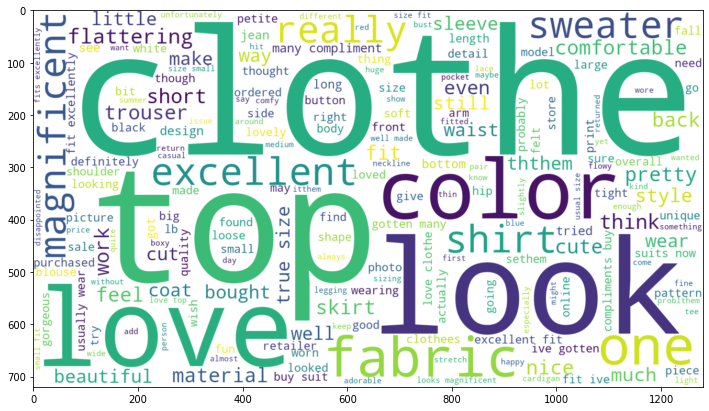

In [145]:
plt.figure(figsize=(12, 8))
wc = wordcloud.WordCloud(background_color='white',
               width=1280, height=720).generate(full_text)
plt.imshow(wc, interpolation='bilinear')
plt.show()

#### Simple Bag of words model for **rating** prediction

In [146]:
test

,Id,Age,Review_Title,Review,Pos_Feedback_Cnt,Division,Department,Product_Category
0,21403,53,magnificent clothe,contrast reviewer love clothe worth sale price...,4,General,Clothes,Clothes
1,22553,51,shapeless tent,tried store huge could try smaller size tried...,2,General,Clothes,Clothes
2,17436,59,versatile,thought fun piece have realize versatile got h...,1,General,Bottoms,Trousers
3,4293,48,simple cute,bought multicolor stripe adorable lbs purchas...,1,General,Clothes,Clothes
4,20149,46,magnificent simple tank,wide strap style flattering tank fitted normal...,0,Initmates,Intimate,Layering
...,...,...,...,...,...,...,...,...
9390,13358,24,love top,sweet lightweight top wear again nice touches ...,11,General Petite,Tops,Knits
9391,12645,32,magnificent addition wardrobe,magnificent piece many things it wore work chu...,0,General Petite,Tops,Knits
9392,7637,35,channel inner joanna gaines,anorak excellention excellent weight color sty...,0,General Petite,Coats,Coats
9393,118,37,awkward fitting,first fabric beautiful lovely spring summer re...,0,General,Tops,Blouses


In [147]:
df = train[['Review_Title', 'Review', 'Rating', 'Recommended']]
df2 = test[['Id', 'Review_Title', 'Review']]

In [148]:
df['Merged_Review'] = df['Review_Title'] + ' ' + df['Review']
df = df.drop(labels=['Review','Review_Title'] , axis=1)
df.head()

,Rating,Recommended,Merged_Review
0,5,1,cute fallholiday top love top quality magnific...
1,5,1,love it excellent fit ive gotten many complime...
2,2,0,disappointed sleeves tight difficult put pric...
3,5,1,gorgeous detailing never write reviews clothe ...
4,5,1,cute comfortable tee love tshirt casual clothe...


In [149]:
df2['Merged_Review'] = df2['Review_Title'] + ' ' + df2['Review']
df2 = df2.drop(labels=['Review','Review_Title'] , axis=1)
df2.head()

,Id,Merged_Review
0,21403,magnificent clothe contrast reviewer love clot...
1,22553,shapeless tent tried store huge could try smal...
2,17436,versatile thought fun piece have realize versa...
3,4293,simple cute bought multicolor stripe adorable ...
4,20149,magnificent simple tank wide strap style flatt...


In [150]:
#train set tokenization
tokenizer=Tokenizer(num_words = 10000, oov_token="'oov'")
tokenizer.fit_on_texts(df['Merged_Review'])
#test set tokenization
tokenizer2=Tokenizer(oov_token="'oov'")
tokenizer2.fit_on_texts(df2['Merged_Review'])

In [151]:
import os
import random
df["split"] = df.apply(lambda x: "train" if random.randrange(0,100) > 10 else "valid", axis=1)

In [152]:
df["split"].value_counts()

train    12517
valid     1571
Name: split, dtype: int64

In [153]:
df["Rating"].value_counts()

5    7906
4    2999
3    1748
2     933
1     502
Name: Rating, dtype: int64

In [154]:
df_train = df[df["split"] == "train"]
df_val = df[df["split"] == "valid"]

In [155]:
maxlen = 200
train_X = pad_sequences(tokenizer.texts_to_sequences(df_train['Merged_Review']), maxlen=maxlen)
val_X = pad_sequences(tokenizer.texts_to_sequences(df_val['Merged_Review']), maxlen=maxlen)

In [156]:
test_clean = pad_sequences(tokenizer2.texts_to_sequences(df2['Merged_Review']), maxlen=maxlen)

In [157]:
import tensorflow as tf

In [158]:
y_train = df_train["Rating"]
y_val = df_val["Rating"]
train_y_class = tf.keras.utils.to_categorical(df_train["Rating"]-1, num_classes=5)
val_y_class = tf.keras.utils.to_categorical(df_val["Rating"]-1, num_classes=5)

In [159]:
max_words = 40000
embedding_dim = 128
model=Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(16, activation="relu"))
model.add(Dense(5, activation="softmax"))
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 128)          5120000   
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 85        
Total params: 5,162,341
Trainable params: 5,162,341
Non-trainable params: 0
_________________________________________________________________
None


In [160]:
model.fit(train_X, train_y_class, epochs=4, validation_data=(val_X, val_y_class))

Epoch 1/4
392/392 [==============================] - 632s 2s/step - loss: 1.1333 - accuracy: 0.5829 - val_loss: 0.8955 - val_accuracy: 0.6340
Epoch 2/4
392/392 [==============================] - 630s 2s/step - loss: 0.7931 - accuracy: 0.6755 - val_loss: 0.8730 - val_accuracy: 0.6474
Epoch 3/4
392/392 [==============================] - 612s 2s/step - loss: 0.6691 - accuracy: 0.7223 - val_loss: 0.8621 - val_accuracy: 0.6556
Epoch 4/4
392/392 [==============================] - 612s 2s/step - loss: 0.5631 - accuracy: 0.7774 - val_loss: 0.9906 - val_accuracy: 0.6454


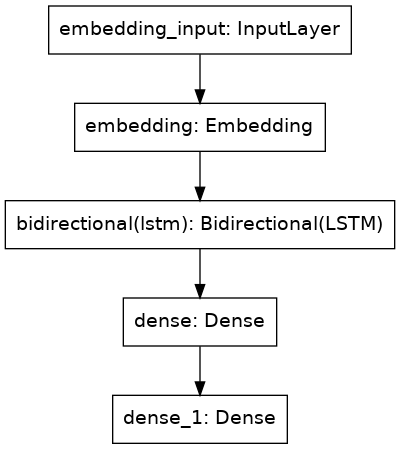

In [161]:
tf.keras.utils.plot_model(model)

In [162]:
pred = model.predict(test_clean)

In [163]:
pred

array([[2.2875094e-01, 3.8134491e-01, 3.6112222e-01, 2.1433217e-02,
        7.3486385e-03],
       [5.9448875e-04, 4.6530136e-04, 2.1892423e-03, 3.0448990e-02,
        9.6630204e-01],
       [3.7847729e-03, 1.3663640e-02, 7.8154914e-02, 3.7058097e-01,
        5.3381568e-01],
       ...,
       [6.7189852e-05, 3.1504285e-05, 2.1333473e-04, 6.2637925e-03,
        9.9342418e-01],
       [1.6010408e-03, 2.6081270e-03, 1.9355319e-02, 3.6838195e-01,
        6.0805351e-01],
       [4.0192719e-04, 6.7157147e-04, 7.3125395e-03, 3.2604915e-01,
        6.6556484e-01]], dtype=float32)

In [164]:
rating_pred=[]
for i in model.predict(test_clean):    
    index = np.argmax(i)
    rating_pred.append(index+1)

In [165]:
rating_pred[:10]

[2, 5, 5, 5, 5, 5, 5, 5, 5, 5]

#### Recommended prediction

In [166]:
train_Y = df_train["Recommended"]
val_Y = df_val["Recommended"]

In [167]:
model=Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.09))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

In [168]:
model.fit(train_X, train_Y, epochs=4, validation_data=(val_X, val_Y))

Epoch 1/4
392/392 [==============================] - 21s 53ms/step - loss: 0.4239 - accuracy: 0.8179 - val_loss: 0.2423 - val_accuracy: 0.9071
Epoch 2/4
392/392 [==============================] - 20s 51ms/step - loss: 0.2080 - accuracy: 0.9252 - val_loss: 0.2376 - val_accuracy: 0.9109
Epoch 3/4
392/392 [==============================] - 21s 54ms/step - loss: 0.1013 - accuracy: 0.9695 - val_loss: 0.2731 - val_accuracy: 0.9064
Epoch 4/4
392/392 [==============================] - 19s 47ms/step - loss: 0.0518 - accuracy: 0.9881 - val_loss: 0.3392 - val_accuracy: 0.9039


In [169]:
pred = model.predict(test_clean)

In [170]:
recom_pred = pred.round(0)

In [171]:
submission = df2

In [172]:
submission['Rating'] = rating_pred
submission['Recommended'] = recom_pred

In [173]:
submission[['Id', 'Rating', 'Recommended']].to_csv('Separate_submission.csv')

> ### Functional API , RNN

In [174]:
train

,Id,Age,Review_Title,Review,Pos_Feedback_Cnt,Division,Department,Product_Category,Rating,Recommended
0,17274,34,cute fallholiday top,love top quality magnificent pattern even cute...,1,General,Tops,Blouses,5,1
1,5921,35,love it,excellent fit ive gotten many compliments buy ...,0,General,Tops,Blouses,5,1
2,16479,40,disappointed,sleeves tight difficult put price want love s...,15,General,Tops,Blouses,2,0
3,1925,28,gorgeous detailing,never write reviews clothe fantastic felt comp...,3,General Petite,Clothes,Clothes,5,1
4,5691,39,cute comfortable tee,love tshirt casual clotheed wedges scarf,0,General,Tops,Knits,5,1
...,...,...,...,...,...,...,...,...,...,...
14086,13641,38,flowy,pattern fabric clothe nice much fabric much ba...,0,General,Clothes,Clothes,3,0
14087,2245,44,soft snuggly cute,like previous reviewer stated like cape id cal...,2,General,Tops,Sweaters,5,1
14088,16929,44,gorgeous,sweater lovely like fact super heavy comfortab...,1,General Petite,Tops,Sweaters,5,1
14089,7362,54,really versatile,love top flattering cut fun summer colors purc...,1,General Petite,Tops,Blouses,5,1


In [175]:
X = train[['Age','Review','Review_Title','Pos_Feedback_Cnt','Division','Department','Product_Category']]
y = train[['Rating','Recommended']]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [176]:
cat_features = X_train[['Division', 'Department', 'Product_Category']]

In [177]:
for x in cat_features.columns:
    print(x ,':', len(cat_features[x].unique()))
#total number for unique categorical features is 27, we will use this in the next steps

Division : 3
Department : 6
Product_Category : 18


In [178]:
category = pd.concat([pd.get_dummies(cat_features)], axis=1).values

In [179]:
category.shape

(10566, 27)

In [180]:
categ_var = 27  
numeric_vars =2
num_words = 10000  
class_num = 5  

BatchNormalization(momentum=0.95, epsilon=0.005,beta_initializer=RandomNormal(mean=0.0, stddev=0.05), gamma_initializer=Constant(value=0.9))

title_inp = tf.keras.Input(shape=(None,), name="title") 
body_inp = tf.keras.Input(shape=(None,), name="body") 
department_inp = tf.keras.Input(shape=(categ_var,), name="department")
num_inp = tf.keras.Input(shape=(numeric_vars,), name="num")
################Title features
title_features = layers.Embedding(num_words, 64)(title_inp)
BatchNormalization()
title_features =  tf.keras.layers.LSTM(64)(title_features,)
BatchNormalization()
title_features=layers.Dropout(.3)(title_features)
title_features=layers.Dense(16, activation='relu')(title_features)
BatchNormalization()
################Body features
body_features = layers.Embedding(num_words, 64)(body_inp)
BatchNormalization()
body_features =  tf.keras.layers.LSTM(64)(body_features,)
BatchNormalization()
body_features = layers.Dropout(.3)(body_features)
body_features = layers.Dense(16, activation='relu')(body_features)
BatchNormalization()
################Categorical features
dep_features = layers.Dense(16, activation='relu')(department_inp)
BatchNormalization()
###############Numeric features
num_features = layers.Dense(8, activation='relu')(num_inp)
BatchNormalization()

In [181]:
x = layers.concatenate([body_features,title_features,dep_features,num_features])

#Predicting recommended
recommended_pred=layers.Dropout(.05)(x)
recommended_pred = layers.Dense(1,activation='sigmoid', name="recommended")(recommended_pred)
#Predicting rating
rating_pred=layers.Dropout(.05)(x)
rating_pred = layers.Dense(class_num,activation='softmax', name="rating")(rating_pred)
#Model
model = tf.keras.Model(inputs=[body_inp,title_inp,department_inp,num_inp], outputs=[recommended_pred, rating_pred])

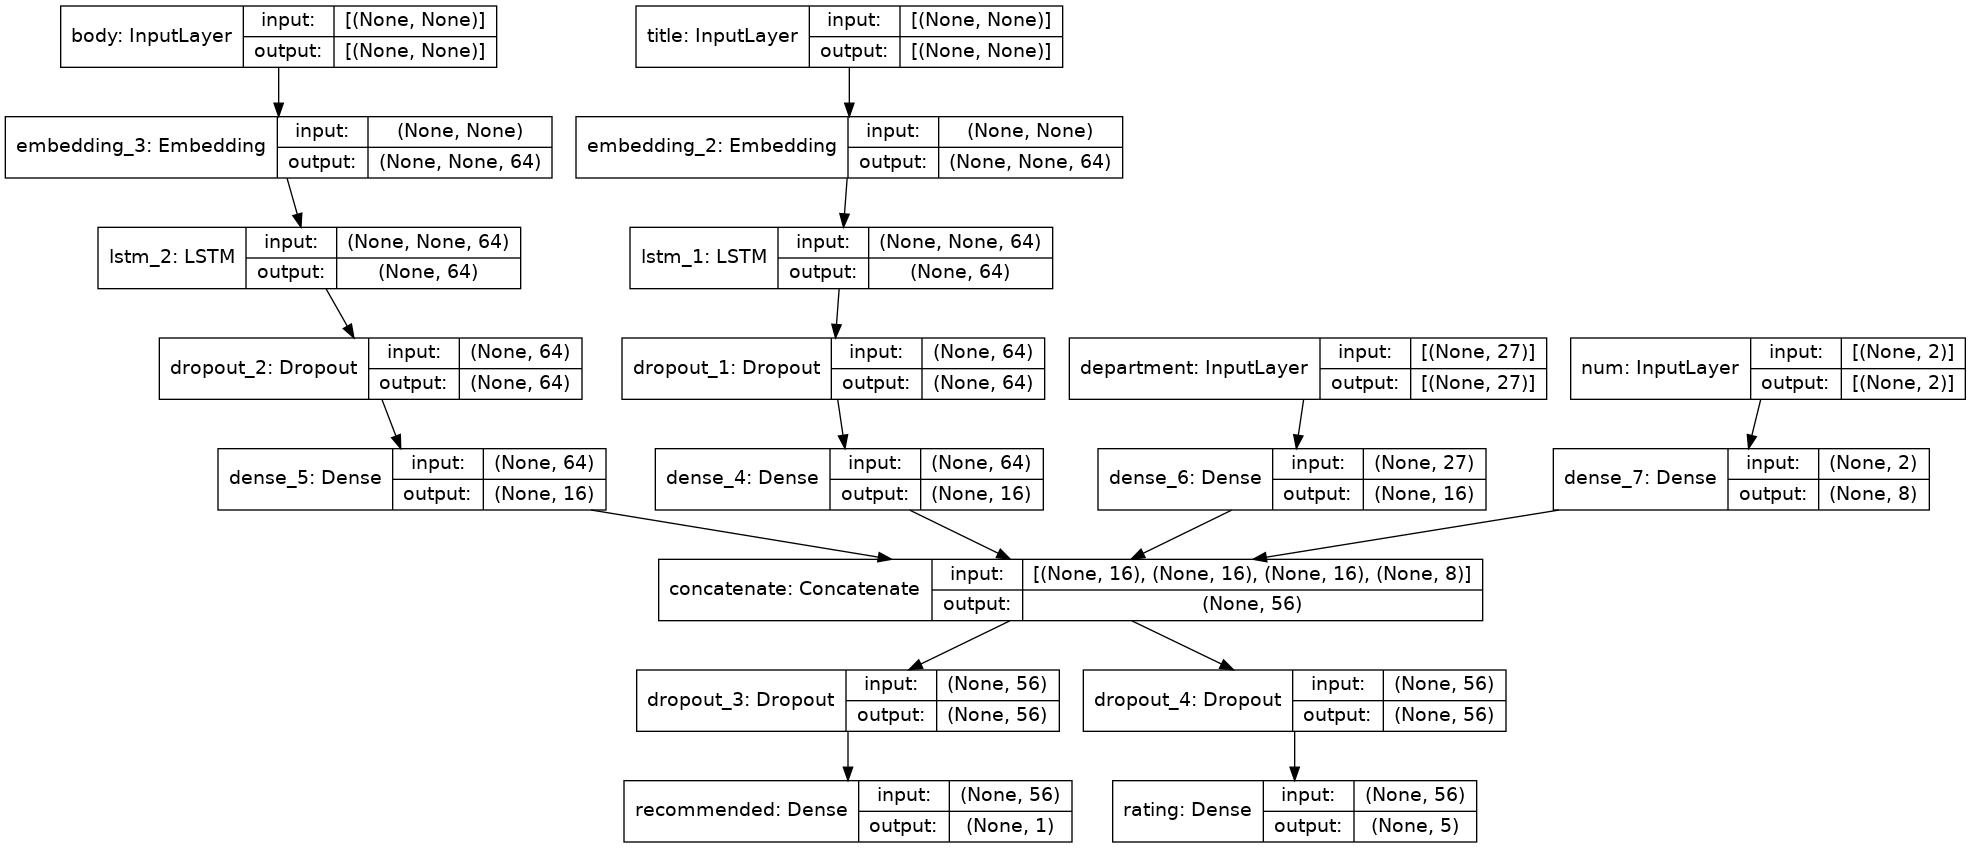

In [182]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [183]:
num_data = pd.concat([X_train['Age'], X_train['Pos_Feedback_Cnt']], axis = 1)

In [184]:
num_data = num_data.values

**Filling the places where we should feed our model**

In [185]:
title = X_train['Review_Title'].values
body = X_train['Review'].values
title = np.asarray(title).astype('str')
body = np.asarray(body).astype('str')

encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=10000 ,ngrams=1)
encoder.adapt(X_train['Review'].values)

In [186]:
encoder.get_vocabulary()[50:60]

['quality',
 'pretty',
 'think',
 'even',
 'xs',
 'usually',
 'work',
 'retailer',
 'tried',
 'skirt']

In [187]:
body_en=encoder(body).numpy()
title_en=encoder(title).numpy()
recommended_tar = y_train['Recommended'].values
rating_tar = pd.get_dummies(y_train['Rating']).values

In [188]:
model.compile(
    optimizer='Adam', #keras.optimizers.RMSprop(1e-3)
    loss={
        "recommended": tf.keras.losses.BinaryCrossentropy(),#from_logits=True),
        "rating": tf.keras.losses.CategoricalCrossentropy()#from_logits=True),
    },
    metrics = ['accuracy']
    #loss_weights=[0.2, 0.8],
)

In [189]:
from tensorflow.keras.callbacks import EarlyStopping

In [190]:
custom_early_stopping = EarlyStopping(monitor='val_rating_accuracy',patience=3,min_delta=0.001,mode='auto', restore_best_weights = True)

In [191]:
# fit the model
hist_train = model.fit({"body": body_en,"title":title_en, "department": category,"num":num_data},
    {"recommended": recommended_tar, "rating": rating_tar},
                               validation_split=0.2, 
                               epochs=15, batch_size = 28, callbacks=[custom_early_stopping])
                               #callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_step_decay,verbose=1)]
# plot model accuracy
#plot_fig(1, history_step_decay)

Epoch 1/15
302/302 [==============================] - 11s 25ms/step - loss: 6.1873 - recommended_loss: 0.8170 - rating_loss: 5.3704 - recommended_accuracy: 0.7598 - rating_accuracy: 0.3024 - val_loss: 1.7312 - val_recommended_loss: 0.4786 - val_rating_loss: 1.2526 - val_recommended_accuracy: 0.8202 - val_rating_accuracy: 0.5445
Epoch 2/15
302/302 [==============================] - 6s 20ms/step - loss: 1.8476 - recommended_loss: 0.4353 - rating_loss: 1.4122 - recommended_accuracy: 0.8195 - rating_accuracy: 0.5322 - val_loss: 1.4085 - val_recommended_loss: 0.3354 - val_rating_loss: 1.0731 - val_recommended_accuracy: 0.8652 - val_rating_accuracy: 0.5842
Epoch 3/15
302/302 [==============================] - 6s 20ms/step - loss: 1.4811 - recommended_loss: 0.3161 - rating_loss: 1.1650 - recommended_accuracy: 0.8758 - rating_accuracy: 0.5917 - val_loss: 1.4202 - val_recommended_loss: 0.3439 - val_rating_loss: 1.0763 - val_recommended_accuracy: 0.8699 - val_rating_accuracy: 0.5927
Epoch 4/15
3

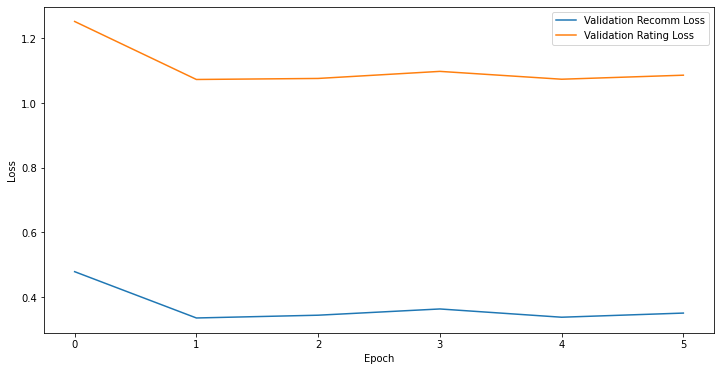

In [192]:
plt.figure(figsize=(12, 6))
plt.plot(hist_train.history['val_recommended_loss'], label='Validation Recomm Loss')
plt.plot(hist_train.history['val_rating_loss'], label='Validation Rating Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [193]:
[recom_output, rating_output]=model.predict([body_en,title_en,category,num_data])

In [194]:
recom_output=recom_output.round().astype('int64')
rating_output=rating_output.argmax(axis=1)+1

### X test data 

In [195]:
category_xt = pd.concat([pd.get_dummies(X_test[['Division', 'Department', 'Product_Category']])], axis=1).values

In [196]:
category_xt.shape

(3522, 27)

In [197]:
num_data_xt = pd.concat([X_test['Age'], X_test['Pos_Feedback_Cnt']], axis = 1).values

In [198]:
num_data_xt.shape

(3522, 2)

In [199]:
title_xt = X_test['Review_Title'].values.astype('str')
body_xt = X_test['Review'].values.astype('str')

body_en_xt=encoder(body_xt).numpy()
title_en_xt=encoder(title_xt).numpy()
#title_xt = np.asarray(title_xt).astype('str')
#body_xt = np.asarray(body_xt).astype('str')

In [200]:
title_en_xt.shape

(3522, 7)

In [201]:
[recom_output_xt, rating_output_xt]= model.predict([body_en_xt,title_en_xt,category_xt,num_data_xt])

In [202]:
recom_output_xt=recom_output_xt.round().astype('int64')
rating_output_xt=rating_output_xt.argmax(axis=1)+1

In [203]:
from collections import Counter
from sklearn.metrics import accuracy_score
print('Training set performance for recommended :', accuracy_score(y_train['Recommended'].values, recom_output))
print('Training set performance for rating:', accuracy_score(y_train['Rating'].values, rating_output))

print()
print('Test set performance for recommended :', accuracy_score(y_test['Recommended'].values, recom_output_xt))
print('Test set performance for Rating :', accuracy_score(y_test['Rating'].values,rating_output_xt))

Training set performance for recommended : 0.889646034450123
Training set performance for rating: 0.6174522051864471

Test set performance for recommended : 0.8642816581487791
Test set performance for Rating : 0.6027825099375355


### Prediction on test data

In [204]:
test

,Id,Age,Review_Title,Review,Pos_Feedback_Cnt,Division,Department,Product_Category
0,21403,53,magnificent clothe,contrast reviewer love clothe worth sale price...,4,General,Clothes,Clothes
1,22553,51,shapeless tent,tried store huge could try smaller size tried...,2,General,Clothes,Clothes
2,17436,59,versatile,thought fun piece have realize versatile got h...,1,General,Bottoms,Trousers
3,4293,48,simple cute,bought multicolor stripe adorable lbs purchas...,1,General,Clothes,Clothes
4,20149,46,magnificent simple tank,wide strap style flattering tank fitted normal...,0,Initmates,Intimate,Layering
...,...,...,...,...,...,...,...,...
9390,13358,24,love top,sweet lightweight top wear again nice touches ...,11,General Petite,Tops,Knits
9391,12645,32,magnificent addition wardrobe,magnificent piece many things it wore work chu...,0,General Petite,Tops,Knits
9392,7637,35,channel inner joanna gaines,anorak excellention excellent weight color sty...,0,General Petite,Coats,Coats
9393,118,37,awkward fitting,first fabric beautiful lovely spring summer re...,0,General,Tops,Blouses


In [205]:
category_test = pd.concat([pd.get_dummies(test[['Division', 'Department', 'Product_Category']])], axis=1).values

In [206]:
category_test.shape

(9395, 27)

In [207]:
num_data_test = pd.concat([test['Age'], test['Pos_Feedback_Cnt']], axis = 1).values

In [208]:
num_data_xt.shape

(3522, 2)

In [209]:
title_test = test['Review_Title'].values.astype('str')
body_test = test['Review'].values.astype('str')
body_en_test=encoder(body_test).numpy()
title_en_test=encoder(title_test).numpy()

In [210]:
[recom_output_final, rating_output_final]= model.predict([body_en_test,title_en_test,category_test,num_data_test])

In [211]:
recom_output_final=recom_output_final.round().astype('int64')
rating_output_final=rating_output_final.argmax(axis=1)+1

In [212]:
Id = test['Id']
pred_df = pd.DataFrame({'Rating' : rating_output_final, 'Recommended': recom_output_final})
pred_df.index = Id

Exception: Data must be 1-dimensional